# Tennis simulation

In [1]:
score_seq = [0, 15, 30, 40, 'A', 'W']

def score_point(player_a_wins, points):

    player = player_a_wins ^ 1
    if points[player] == 40 and points[player == 0] not in [40, 'A']:
        return ['W' if player == 0 else points[0], 'W' if player == 1 else points[1]]

    if (points[player] == 40) and (points[player == 0] == 'A'):
        return [40, 40]

    a = points.copy()
    a[player] = score_seq[score_seq.index(points[player]) + 1]
    return a


def test(player, given_score, expected_score):
    score = score_point(player, given_score)
    assert score == expected_score, f"Expected {expected_score} but got {score}"

test_cases = [
    [1, [ 0,  0], [15,  0]],
    [1, [15,  0], [30,  0]],
    [1, [30,  0], [40,  0]],
    [1, [40,  0], ['W', 0]],
    [1, ['A', 0], ['W', 0]],
    [1, [40, 40], ['A', 40]],
    [1, ['A', 40], ['W', 40]],
    [1, [40, 'A'], [40, 40]],
    [0, [ 0, 15], [ 0, 30]],
    [0, [ 0, 30], [ 0, 40]],
    [0, [ 0, 40], [ 0, 'W']],
    [0, [ 0, 'A'], [ 0, 'W']],
    [0, [40, 40], [40, 'A']],
    [0, [40, 'A'], [40, 'W']],
    [0, ['A', 40], [40, 40]]
]

for t in test_cases:
    test(*t)

In [2]:
%%capture cap --no-stderr
import random

win_prob_a = 0.52

max_matches = 10000
games_per_set = 6
sets_per_match = 2
tiebreak_normal = 7;
tiebreak_last = 10;

matches_a = matches_b = tot_sets_a = tot_sets_b = tot_games_a = tot_games_b = tot_points_a = tot_points_b = 0

print('F', 'P', 'AS', 'BS', 'AG', 'BG', 'AP', 'BP',
      'AW', 'BW', 'ATS', 'BTS', 'ATG', 'BTG',
      'MAP', 'SAP', 'GAP', 'PAP', sep='\t') 

print_stats = lambda flag : print(flag, int(a_win_point), sets_a, sets_b, games_a, games_b, points[0], points[1],
                      matches_a, matches_b, tot_sets_a, tot_sets_b,  tot_games_a, tot_games_b,
                      round(matches_a / (matches_a + matches_b) if matches_a + matches_b != 0 else 0, 3), 
                      round(tot_sets_a / (tot_sets_a + tot_sets_b) if tot_sets_a + tot_sets_b != 0 else 0, 3), 
                      round(tot_games_a / (tot_games_a + tot_games_b) if tot_games_a + tot_games_b != 0 else 0, 3), 
                      round(tot_points_a / (tot_points_a + tot_points_b) if tot_points_a + tot_points_b != 0 else 0, 3), 
                      sep='\t')

while matches_a + matches_b < max_matches:
    sets_a = sets_b = 0
    while sets_a < sets_per_match and sets_b < sets_per_match:
        games_a = games_b = 0
        # Continue playing normal games until one player gets to 6 or it is 6-5 or 5-6
        while ((games_a < games_per_set and games_b < games_per_set) or
                (games_a == games_per_set and games_b == games_per_set -1) or
                (games_b == games_per_set and games_a == games_per_set - 1)):
            points = [0, 0]
            while True:
                a_win_point = random.random() < win_prob_a
                tot_points_a += a_win_point
                tot_points_b += not a_win_point
                print_stats(0)
                if points[0] == 'W' or points[1] == 'W':
                    break
                points = score_point(a_win_point, points)
            games_a += points[0] == 'W'; tot_games_a += points[0] == 'W'
            games_b += points[1] == 'W'; tot_games_b += points[1] == 'W'
            print_stats(1)

        sets_a += games_a > games_b; tot_sets_a += games_a > games_b
        sets_b += games_b > games_a; tot_sets_b += games_b > games_a
        if(games_a != games_b):
            print_stats(2)

        # Either one player has won the set or it is 6-6 and we need to play a tiebreak
        if games_a == games_b:
            count_a = count_b = 0
            if sets_a + sets_b == 2 * sets_per_match - 2:
                tiebreak = tiebreak_last
            else:
                tiebreak = tiebreak_normal
            while (count_a < tiebreak and count_b < tiebreak) or abs(count_a - count_b) < 2:
                a_win_point = random.random() < win_prob_a
                count_a += a_win_point; tot_points_a += a_win_point
                count_b += not a_win_point; tot_points_b += not a_win_point
                print_stats(0)
            sets_a += count_a > count_b; tot_sets_a += count_a > count_b
            sets_b += count_b > count_a; tot_sets_b += count_b > count_a  
            print_stats(2)
            
    matches_a += sets_a > sets_b
    matches_b += sets_b > sets_a
    print_stats(3)

           MAP    SAP   GAP   PAP
2105062  0.708  0.644  0.55  0.52


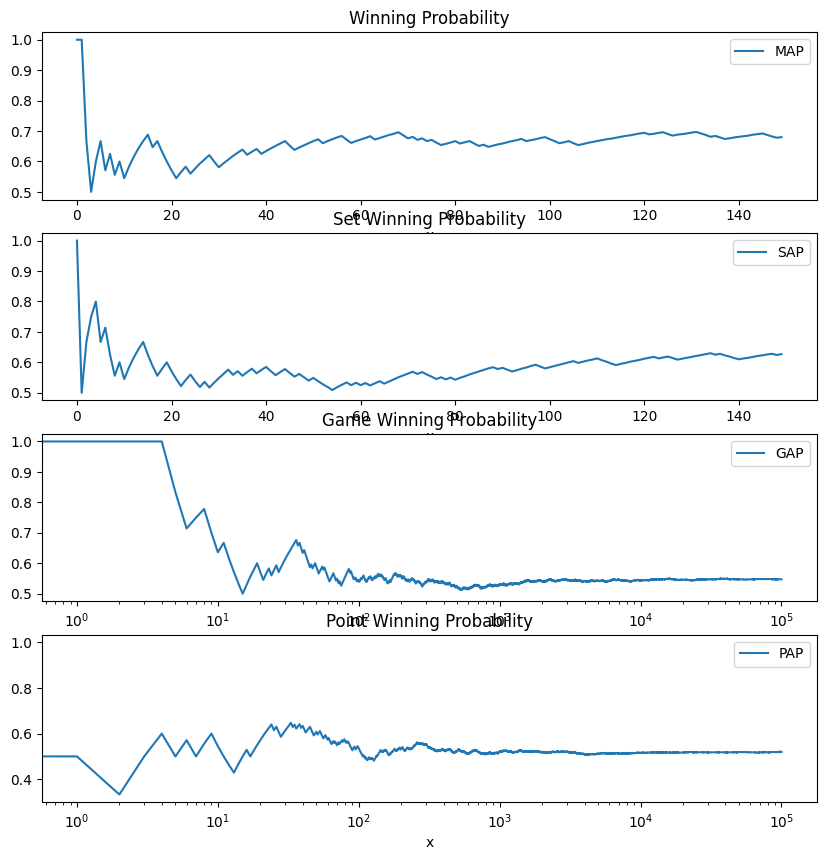

In [3]:
import pandas as pd
from io import StringIO

# Avoids SettingWithCopyWarning
pd.options.mode.copy_on_write = True

data_io = StringIO(cap.stdout)
df = pd.read_csv(data_io, sep='\t')

# Create a dataset containing just rows where Flag is 2
dfp = df[df['F'] == 0]
dfg = df[df['F'] == 1]
dfs = df[df['F'] == 2]
dfw = df[df['F'] == 3]

# Plot first N, N1 rows
N = 150
N1 = int(10e4)
dfw = dfw.head(N)
dfs = dfs.head(N)
dfg = dfg.head(N1)
dfp = dfp.head(N1)

# Create an increasing integer sequence for x-values
dfp['x']  = range(0, N1)
dfg['x'] = range(0, N1)
dfs['x'] = range(0, N)
dfw['x'] = range(0, N)

print(df[['MAP', 'SAP', 'GAP', 'PAP']].tail(1))

# On the same plot, plot the winning probability, set winning probability, and point winning probability in time
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(10, 10))

dfw.plot(x='x', y='MAP', ax=ax[0], title='Winning Probability');
dfs.plot(x='x', y='SAP', ax=ax[1], title='Set Winning Probability');
ax[2].set_xscale('log')
dfg.plot(x='x', y='GAP', ax=ax[2], title='Game Winning Probability');
ax[3].set_xscale('log')
dfp.plot(x='x', y='PAP', ax=ax[3], title='Point Winning Probability');